---


In this notebook i'm gooing to explain mathematics formulas behind a few clustering algorithm and implement them.


---

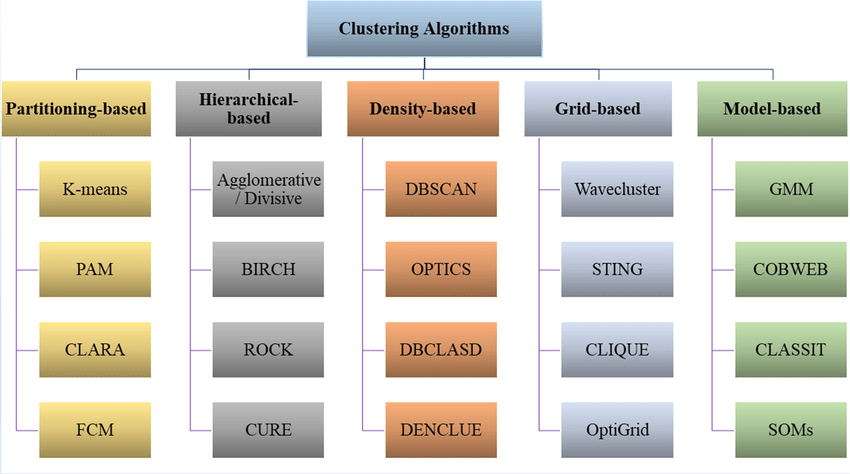




#K-Means Clustering
Clustering is a method to divide a set of data into a specific number of groups. one of the most popular method is k-means clustering. In k-means clustering, it partitions a collection of data into a k number disjoint cluster. K -means algorithm consists of two separate phases. In the first phase it calculates the k centroid and in the second phase it takes each point to the cluster which has nearest centroid from the respective data point.

One of the most used methods to define the distance of the nearest centroid and is Euclidean distance.Once the grouping is done it recalculate the new centroid of each cluster and based on that, centroid. Next a new Euclidean distance is calculated between each center and each data point and algorithm assigns the points to the cluster which have minimum Euclidean distance. Each cluster in the data is defined by its member objects and by its centroid. The centroid for each cluster is the point to which the sum of distances from all the objects in that cluster is minimized. So K-means is an iterative algorithm in which it minimizes the sum of distances from each object to its cluster centroid, over all clusters

---


##Applications:


* [Image Segmentation](https://www.sciencedirect.com/science/article/pii/S1877050915014143)
* [Chromosome segmentation](https://https://www.ijser.org/paper/Chromosome-Segmentation-Using-K-Means-Clustering.html)
* [News Comments Clustering](https://ieeexplore.ieee.org/document/5591774/)
* [Grouping inventory by sales activity](https://www.sciencedirect.com/science/article/pii/S1877050915035929)
* [Clustering animals](https://www.sciencedirect.com/science/article/pii/S1877050914013155)
* [Bots and Anomaly Detection](https://www.computerweekly.com/tip/Botnet-detection-through-DNS-behavior-and-clustering-analysis)


---

##Math

Assuming we have input data points with positions $(x_1, y_1), (x_2, y_2), .....$ and value of K (the number of clusters needed). Algorithm follow the below procedure:



1. Pick K points as the initial centroids from the dataset, either randomly or use predefined initial centroids. 
2. Distance of each point in the dataset with the centeroids. For  example using Euclidean distance:

  $d = \| (x_i, y_i) - cₖ \|$

  Where $(x_i, y_i)$ means i-th point position and $cₖ$ means k-th cluster center.

3. Assign each data point to the closest centroid using the distance found in the previous step.
4. Calculate the new centroid by finding the point to which the sum of distances from all the objects in that cluster is minimized.
5. Repeat steps from 2 to 4 for a fixed number of iteration, till the centroids don’t change or or position of centeroids satisfies the target error value.


Although k-means has the great advantage of being easy to implement, it has some drawbacks. The quality of the final clustering results is depends on the arbitrary selection of initial centroid. So if the initial centroid is randomly chosen, it will get different result for different initial centers. So the initial center will be carefully chosen so that we get our desire segmentation. And also computational complexity is another term which we need to consider while designing the K-means clustering. It relies on the number of data elements, number of clusters and number of iteration








sources:

* https://www.sciencedirect.com/science/article/pii/S1877050915014143?via%3Dihub

* https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/#:~:text=K%2DMeans%20is%20one%20of,is%20to%20the%20cluster%20centroid.

* https://www.youtube.com/watch?v=W4fSRHeafMo&list=PLhhyoLH6IjfxpLWyOgBt1sBzIapdRKZmj&index=5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from tqdm.notebook import tqdm

Termination criterion satisfied


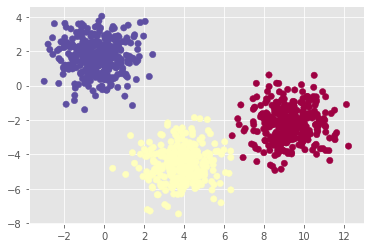

In [ ]:
"""
From scratch implementation of K means clustering which is a unsupervised 
clustering  method that works by iteratively computing new centroids and 
moving centroids to the center of the new formed clusters.

Programmed by Aladdin Persson <aladdin.persson at hotmail dot com>
*    2020-05-28 Initial coding

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predict_cluster(clusters, X)

        if self.plot_figure:
            self.plot_fig(X, y_pred)

        return y_pred



#main
np.random.seed(10434)
num_clusters = 3
X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters)
Kmeans = KMeansClustering(X, num_clusters)
y_pred = Kmeans.fit(X)


---
#K-NN 
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.


---

sources:


*   https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
*   https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/02_knn_notes.pdf




In [ ]:
# Example of making predictions
from math import sqrt

# We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 

# Locate the most similar neighbors

#Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.
#To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.
#Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.
#We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.
def get_neighbors(train, test_row, num_neighbors):
  distances = list()
  for train_row in train:
    dist = euclidean_distance(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  print(distances)
  neighbors = list()
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors


# Make a classification prediction with neighbors
#The most similar neighbors collected from the training dataset can be used to make predictions.
#In the case of classification, we can return the most represented class among the neighbors.
def predict_classification(train, test_row, num_neighbors):
  neighbors = get_neighbors(train, test_row, num_neighbors)
  output_values = [row[-1] for row in neighbors]
  prediction = max(set(output_values), key=output_values.count)
  return prediction


# Test distance function
dataset = [[2.7810836,2.550537003,0],
					[1.465489372,2.362125076,0],
					[3.396561688,4.400293529,0],
					[1.38807019,1.850220317,0],
					[3.06407232,3.005305973,0],
					[7.627531214,2.759262235,1],
					[5.332441248,2.088626775,1],
					[6.922596716,1.77106367,1],
					[8.675418651,-0.242068655,1],
					[7.673756466,3.508563011,1]]
point = 8
prediction = predict_classification(dataset, dataset[point], 3)
print('Expected %d, Got %d.' % (dataset[point][2], prediction))

[([8.675418651, -0.242068655, 1], 0.0), ([6.922596716, 1.77106367, 1], 2.6692857647275323), ([7.627531214, 2.759262235, 1], 3.1790022321304874), ([7.673756466, 3.508563011, 1], 3.882082563117496), ([5.332441248, 2.088626775, 1], 4.075247121880034), ([3.06407232, 3.005305973, 0], 6.483259182001387), ([2.7810836, 2.550537003, 0], 6.522409988228337), ([3.396561688, 4.400293529, 0], 7.029783601452239), ([1.38807019, 1.850220317, 0], 7.581762376544907), ([1.465489372, 2.362125076, 0], 7.66582710454398)]
Expected 1, Got 1.


#DBSCAN

source: https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

To start off the algorithm, we choose a random point.

there are 2 major parameters for DBSCAN clustering.

$\epsilon$ - this is the radius of the circle that we must draw around our pointing focus.

$mPts$ Minimum number of points - This is the number of points that we want in the neighbourhood of our point in focus (within the circle).

We draw a circle of radius ‘epsilon’ around the chosen point and inspect the neighbourhood.

There are few rules to follow here;

- A point is a ‘core point’ if its neighbouring points are greater than or equal to the minimum points we chose at the start. $N>=mPts$

- A point is a ‘border point’ if its neighbouring points are less than the minimum points we chose at the start.
$N=< mPts$

- A point is considered ‘Noise’ if it has no points in its neighbourhood
$N=0$

If we find core point we check for all rules all points within its radius,

If we find border point we do not look further randomly select another point as a starter point for new cluster.

If we find noise point we classifiy if as noise and randomly select another point as a starter point for new cluster.



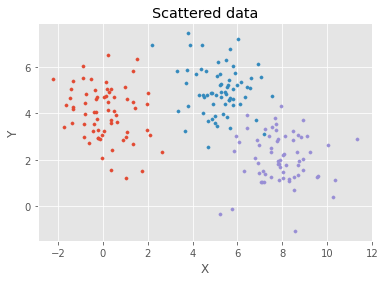

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

centers = [(0, 4), (5, 5) , (8,2)]
cluster_std = [1.2, 1, 1.1]

X, y= make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

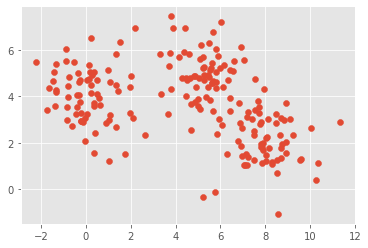

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
#Implementation with stack

def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']
    
    #check available points within radius
    temp =  df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]
    
    #check how many points are present within radius
    if len(temp) >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , True, False, False)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, True, False)
    
    elif len(temp) == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return (temp.index , False, False, True)

def cluster_with_stack(eps, minPts, df):
    
    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) != 0: #run until a cluster is complete
            
            #pop current point from stack
            curr_idx = current_stack.pop()
            
            #check if point is core, neighbour or border
            neigh_indexes, iscore, isborder, isnoise = check_core_point(eps, minPts, df, curr_idx)
            
            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise 
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]
    
                continue
                
            unvisited.remove(curr_idx) #remove point from unvisited list
            
            
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            if iscore: #if current point is a core
                first_point = False
                
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))
                
                continue
                
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters
            



Text(0, 0.5, 'Y')

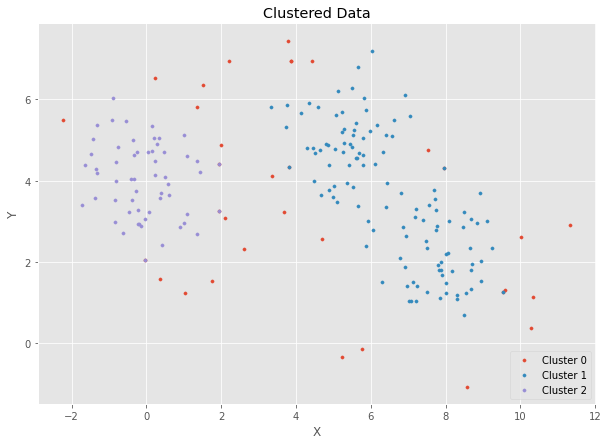

In [ ]:
#radius of the circle defined as 0.6
eps = 0.6
#minimum neighbouring points set to 3
minPts = 3

data = pd.DataFrame(X, columns = ["X", "Y"] )
clustered = cluster_with_stack(eps, minPts, data)

bbidx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["idx", "cluster"])

plt.figure(figsize=(10,7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')

#hierarchical clustering

Strategies for hierarchical clustering generally fall into two categories:

Agglomerative: This is a "bottom-up" approach: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive: This is a "top-down" approach: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
Steps: 
- Make each data point a single cluster. Suppose that forms n clusters.
- Take the 2 closet data points and make them one cluster. Now the total clusters become n-1.
- Take the 2 closet clusters and make them one cluster. Now the total clusters become n-2.
- Repeat Step 3 until only one cluster is left.


Very slow $O(n^3)$ complexity

In order to decide which clusters should be combined (for agglomerative), or where a cluster should be split (for divisive), a measure of dissimilarity between sets of observations is required.

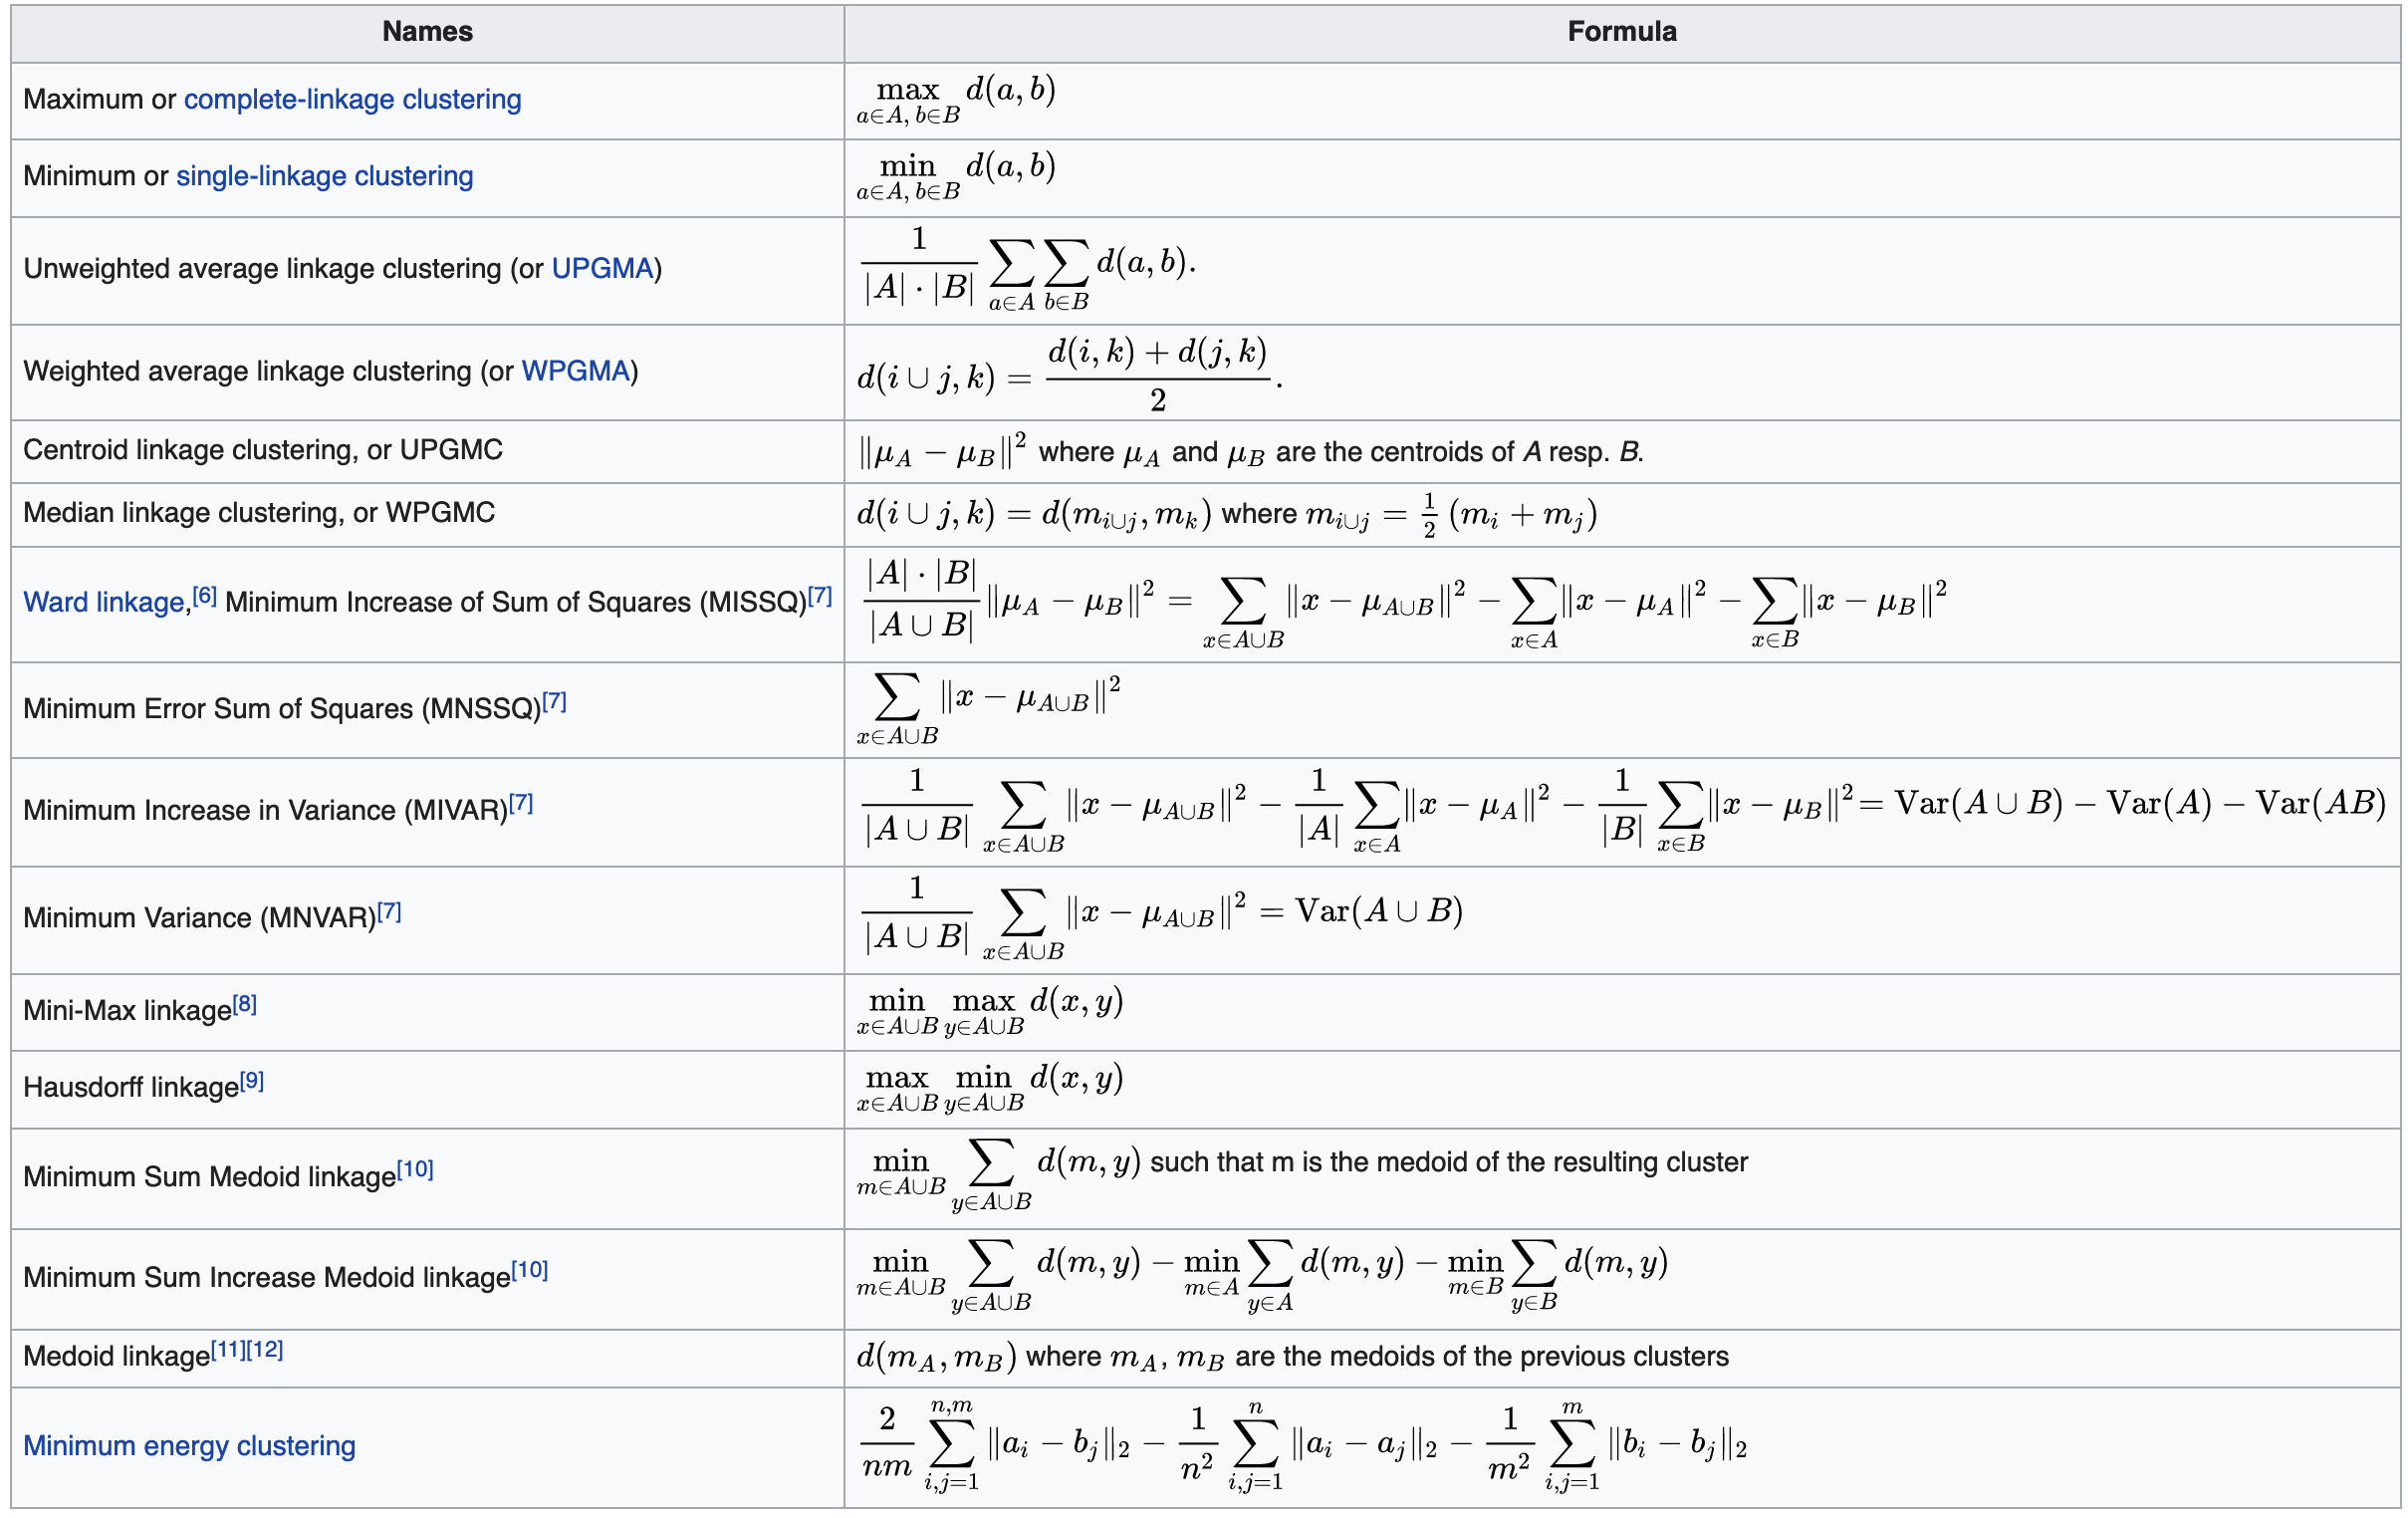

In [ ]:
import math
#https://github.com/OlaPietka/Agglomerative-Hierarchical-Clustering-from-scratch/blob/main/main.py

def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link


from measures import get_distance_measure


class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))



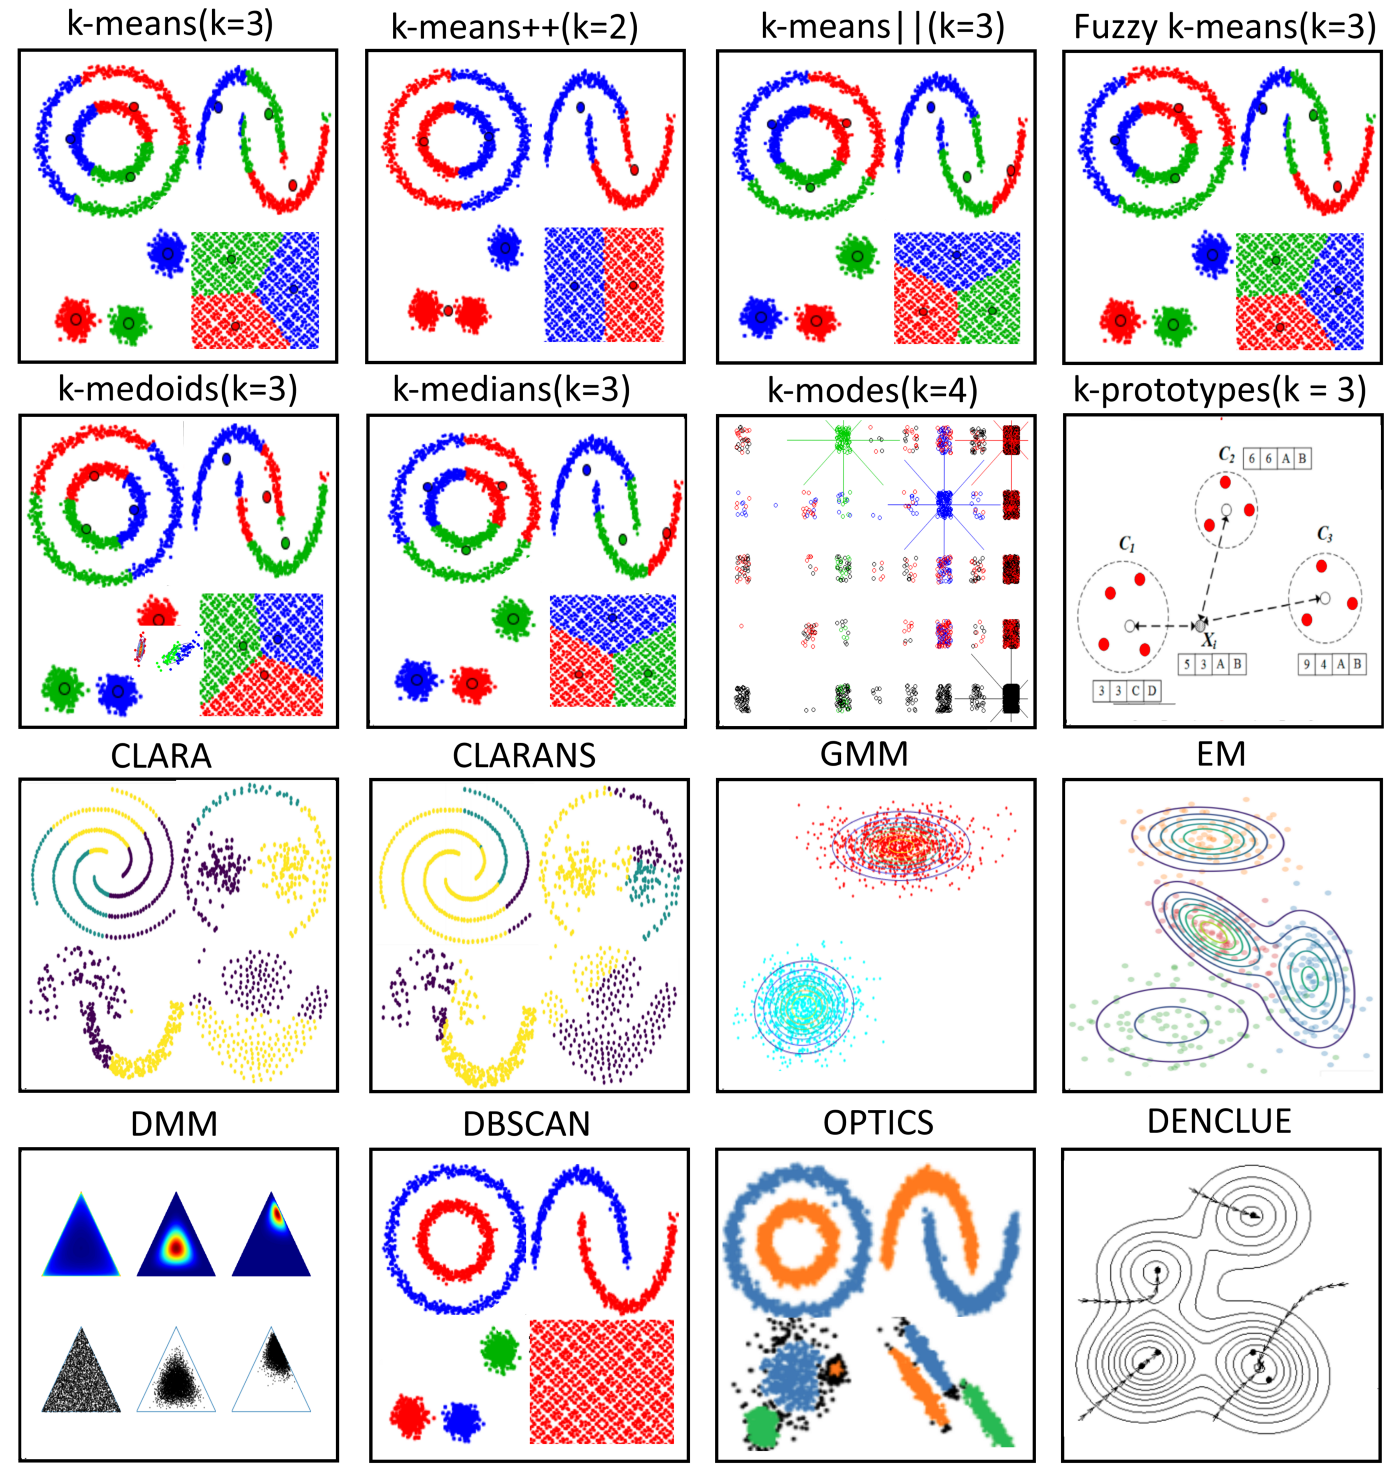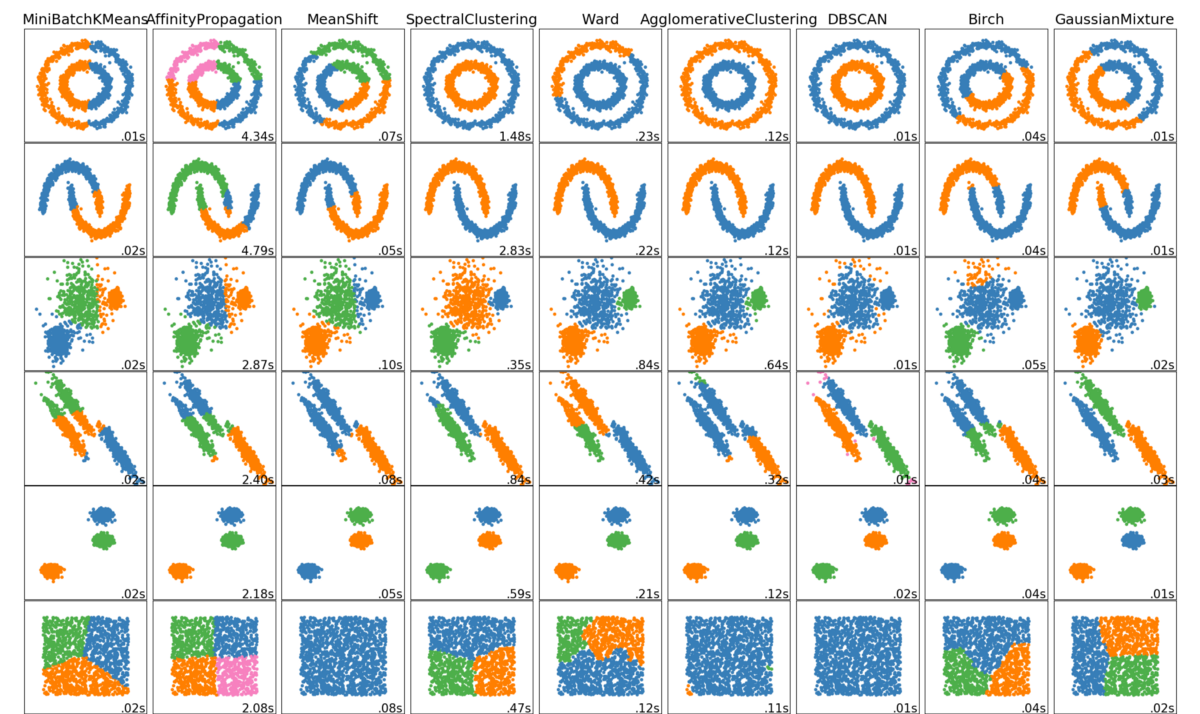

---
#Mean Shift




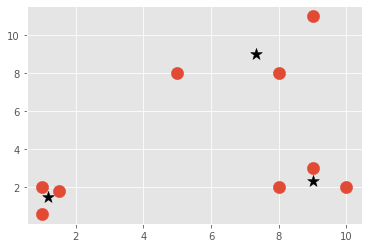

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))b

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

#AUTOENCODERS

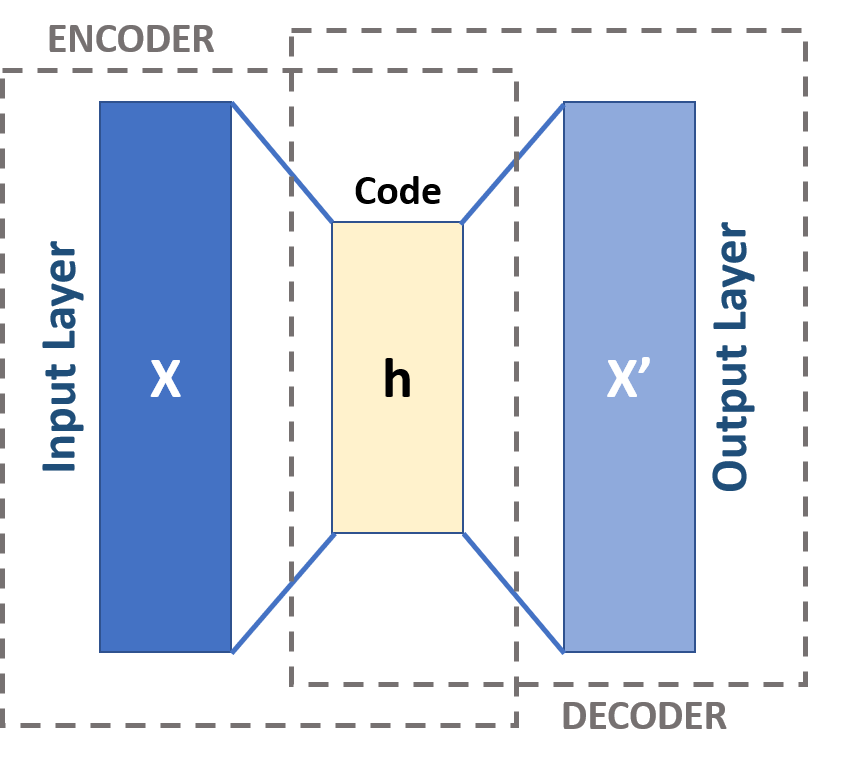

#Generative Adversarial Networks

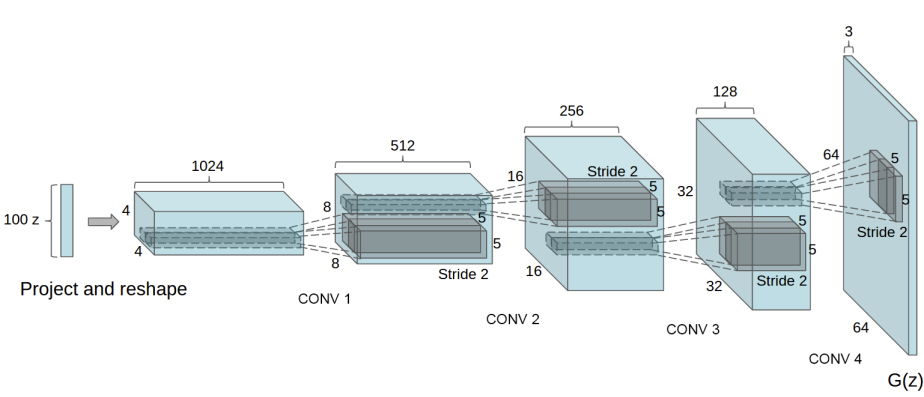